# Importando bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.style.use("seaborn")


# Criando um database dos arquivos dos exercícios

In [3]:
import shutil, os
import csv
from PIL import Image

exercicios = {}
users = []
for i in range (1,400):
    
    if i <10:
        user= "00"+ str(i)
    
    elif i<100:
        user= "0"+ str(i)
        
    else:
        user=str(i)
        

    path = 'backup/user_' + user
    
    users.append(path)
    
    
    data=[]
    for filename in os.listdir(path):
        data.append(filename)
        #writer.writerow(data)
        #########################
#         if "ch3_" in filename:
#             print(filename)
# #             os.mkdir('pasta')
#             f = path+'/'+filename

#             shutil.copy(f, 'pasta')
            
        #########################
    exercicios[int(user)]=data
    data=[]


In [4]:
dict={}
lista=[]
for k in exercicios.keys():
    exs={}
    for l in exercicios[k]:
            p=l.find('_')
            numero=int(l[2:p])          
            if numero not in exs:
                exs[numero] = 1
                lista.append(numero)
            else:
                exs[numero] += 1
    dict[k]=exs

In [5]:
from collections import OrderedDict 
dict1 = OrderedDict(sorted(dict.items())) 


In [6]:
dados = pd.DataFrame.from_dict(dict1) 


In [7]:
dados=dados.T

In [8]:
df = dados.reindex(columns=sorted(dados.columns))


In [9]:
df=df.fillna(0)


In [10]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,172,173,174,175,176,177,178,179,180,181
1,1.0,1.0,7.0,3.0,21.0,2.0,14.0,4.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,7.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,15.0,5.0,2.0,6.0,2.0,0.0,0.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,5.0,7.0,2.0,1.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Análise exploratória   - Quantos fizeram?

## Escreva o número do exercício:

In [11]:
numero_exercicio = 3

## Escreva o nome do exercício (mesmo da pasta no repositório)

In [12]:
nome_exercicio = "gaussiana"

In [13]:
exercicio3=df[numero_exercicio]
total = exercicio3.count()
naoFeito = exercicio3.isna().sum()
feito=total-naoFeito
naoFeito

0

In [14]:
tentativas_ex3 = exercicio3.value_counts()

total_tentativas=tentativas_ex3.sum()
naoFeitos_ex3 = tentativas_ex3[0]

feitos=total-naoFeitos_ex3
print(f"Porcentagem dos que fizeram: {(feitos/(total_tentativas))*100}%")

Porcentagem dos que fizeram: 79.9498746867168%


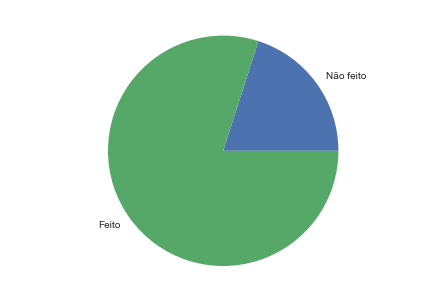

In [15]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie((naoFeitos_ex3,feitos), labels = ('Não feito', 'Feito'))
plt.show()

# Quantidade de tentativas

Text(0, 0.5, 'Alunos')

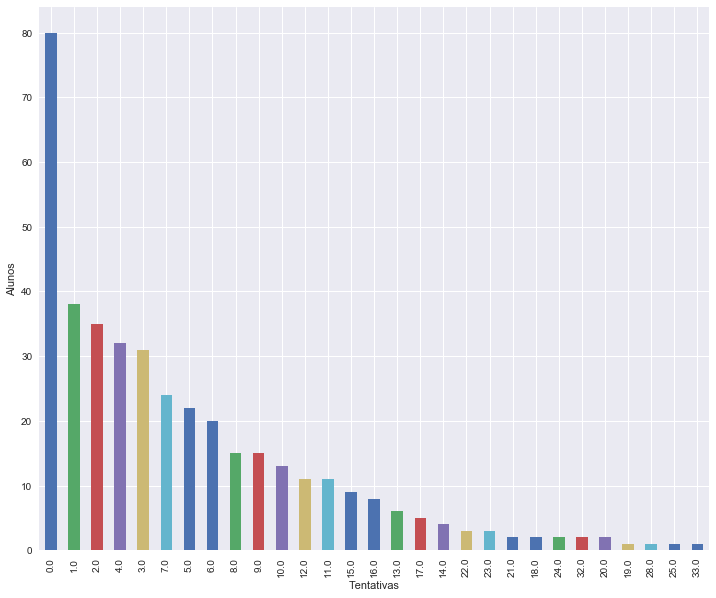

In [16]:
fig=plt.figure(figsize=(12,10))
tentativas_ex3.plot(kind='bar',  legend=False)
plt.xlabel('Tentativas')
plt.ylabel('Alunos')


## Média de tentativas

In [17]:
print(f"Média: {int(np.mean(tentativas_ex3))}")

Média: 13


# Analisando os erros

In [18]:
json_results= "exercicios/analise-exercicios/"+ nome_exercicio + "/resultado.json"
json_results

'exercicios/analise-exercicios/gaussiana/resultado.json'

In [19]:
df_exs = pd.read_json(json_results, orient='records')
df_exs = df_exs.rename(columns = {'id':'id','erros':'erros', 'resultado':'passou'})


In [20]:
#df_exs=df_exs.set_index('id')
df_exs.tail(4)

,erros,id,passou
2313,[^\nSyntaxError:],ch3_2020_03_04_20_08_39_273348.py,False
2314,[^\nSyntaxError:],ch3_2019_09_11_23_12_24_127271.py,False
2315,[^\nSyntaxError:],ch3_2020_03_04_19_49_40_592877.py,False
2316,"[test_1\nAssertionError:, test_2\nAssertionErr...",ch3_2020_09_04_16_47_36_060892.py,False


In [21]:
id = df_exs["id"]


In [22]:
r = df_exs["passou"]


In [23]:
df_erros=df_exs[df_exs['passou']==False]

df_erros.head()

,erros,id,passou
1,[^\nSyntaxError:],ch3_2019_08_13_16_52_03_378932.py,False
2,[calcula_gaussiana\nTypeError:],ch3_2020_03_09_19_11_49_185208.py,False
3,[^\nSyntaxError:],ch3_2020_02_28_17_44_32_436097.py,False
4,[^\nSyntaxError:],ch3_2019_03_01_12_59_50_648548.py,False
5,[calcula_gaussiana\nTypeError:],ch3_2020_02_20_00_11_13_695953.py,False


In [24]:
df_erros['erros'] = [''.join(map(str, l)) for l in df_erros['erros']]
df_erros.head()


,erros,id,passou
1,^\nSyntaxError:,ch3_2019_08_13_16_52_03_378932.py,False
2,calcula_gaussiana\nTypeError:,ch3_2020_03_09_19_11_49_185208.py,False
3,^\nSyntaxError:,ch3_2020_02_28_17_44_32_436097.py,False
4,^\nSyntaxError:,ch3_2019_03_01_12_59_50_648548.py,False
5,calcula_gaussiana\nTypeError:,ch3_2020_02_20_00_11_13_695953.py,False


In [25]:
num = [0,1,2,3,4,5,6,7,8,9]
tipos_erros = ["AssertionError","SyntaxError", "IndentationError", "TypeError", "NameError", "PriorityError", "ModuleNotFoundError", "TabError", "UnboundLocalError", "AttributeError", "ZeroDivisionError", "OverflowError"]
tipos = []
for ind in df_erros.index: 
#     erro = "AssertionError:"
#     for n in num:
#         if str(n) in df_erros["erros"][ind]:
#             erro+=(str(n)+"/")
#     if (erro !=  ("AssertionError:")):
#         df_erros["erros"][ind] = erro
    for e in tipos_erros:
        if e in  df_erros["erros"][ind]:
            df_erros["erros"][ind] = e
    
#     elif  "SyntaxError" in df_erros["erros"][ind]:
#         df_erros["erros"][ind] = "SyntaxError"
    
#     elif "IndentationError" in df_erros["erros"][ind]:
#         df_erros["erros"][ind] = "IndentationError"
        
#     else: 
#         if df_erros["erros"][ind] not in tipos:
#             tipos.append(df_erros["erros"][ind])

            
            
print(tipos)
df_erros.head()

[]


,erros,id,passou
1,SyntaxError,ch3_2019_08_13_16_52_03_378932.py,False
2,TypeError,ch3_2020_03_09_19_11_49_185208.py,False
3,SyntaxError,ch3_2020_02_28_17_44_32_436097.py,False
4,SyntaxError,ch3_2019_03_01_12_59_50_648548.py,False
5,TypeError,ch3_2020_02_20_00_11_13_695953.py,False


In [26]:
df_erros.head()

,erros,id,passou
1,SyntaxError,ch3_2019_08_13_16_52_03_378932.py,False
2,TypeError,ch3_2020_03_09_19_11_49_185208.py,False
3,SyntaxError,ch3_2020_02_28_17_44_32_436097.py,False
4,SyntaxError,ch3_2019_03_01_12_59_50_648548.py,False
5,TypeError,ch3_2020_02_20_00_11_13_695953.py,False


In [27]:
erros_count = df_erros["erros"].value_counts().to_frame()
erros_count

,erros
SyntaxError,676
AssertionError,504
TypeError,443
NameError,192
PriorityError,83
IndentationError,58
TabError,28
ModuleNotFoundError,13
UnboundLocalError,11
ZeroDivisionError,5


Text(0, 0.5, 'Quantidade')

<Figure size 864x576 with 0 Axes>

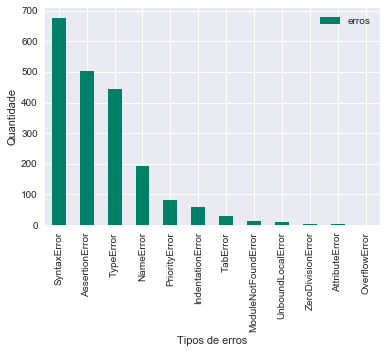

In [28]:
plt.figure(figsize=(12, 8))
sns.despine()
ax = erros_count.plot(kind='bar',colormap='summer')
plt.xlabel('Tipos de erros')
plt.ylabel('Quantidade')
# x_labels = ["AssertionError", "SyntaxError", "IndentationError"]
#ax.legend(x_labels)
# ax.set_xticklabels(x_labels)

## Adicionando os IDs dos usuários ao dataframe

In [29]:
import os

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [30]:
dir = r"C:\Users\gabic\Documents\NINJA_DeSoft\submissoes_servidor\backup"
files = list_files(dir)

In [31]:
lista_files = []
for f in files:
    f = f[65:]
    f.replace("//","/")
    lista_files.append(f)
    
lista_files= lista_files[1:]

In [32]:
df_erros["usuario"]="0"


In [34]:
 for ind in df_erros.index: 
        for l in lista_files:
            user = l[0:8]
            ex = l[9:]
            if ex == df_erros["id"][ind]:
                df_erros["usuario"][ind] = user
#                 print(user)
#                 print(ex)


In [35]:
df_erros.head()

,erros,id,passou,usuario
1,SyntaxError,ch3_2019_08_13_16_52_03_378932.py,False,user_086
2,TypeError,ch3_2020_03_09_19_11_49_185208.py,False,user_093
3,SyntaxError,ch3_2020_02_28_17_44_32_436097.py,False,user_321
4,SyntaxError,ch3_2019_03_01_12_59_50_648548.py,False,user_236
5,TypeError,ch3_2020_02_20_00_11_13_695953.py,False,user_282


In [36]:
users_count = df_erros["usuario"].value_counts()
users_count

user_230    33
user_252    32
user_154    30
user_085    26
user_276    23
user_086    23
user_363    23
user_206    22
user_330    22
user_217    22
user_117    21
user_205    21
user_372    21
user_212    21
user_319    20
user_343    19
user_060    18
user_321    18
user_014    17
user_345    16
user_393    16
user_019    16
user_299    16
user_088    16
user_027    16
user_142    16
user_017    15
user_203    15
user_265    15
user_269    15
            ..
user_139     1
user_096     1
user_094     1
user_339     1
user_380     1
user_331     1
user_325     1
user_168     1
user_280     1
user_041     1
user_255     1
user_244     1
user_170     1
user_322     1
user_180     1
user_029     1
user_039     1
user_146     1
user_286     1
user_107     1
user_328     1
user_114     1
user_211     1
user_353     1
user_365     1
user_161     1
user_134     1
user_083     1
user_137     1
user_193     1
Name: usuario, Length: 294, dtype: int64

In [38]:
# f, ax = plt.subplots(figsize = (32,20))
# plt.figure(figsize = (640,200))
erros = df_erros["erros"]
users = df_erros["usuario"]
table = pd.crosstab(erros, users)
# plot=sns.heatmap(table,ax=ax, annot=True, cmap="YlGnBu")
# f.savefig("heatmap.png", dpi=200)
table

usuario,user_001,user_003,user_004,user_005,user_006,user_007,user_009,user_010,user_011,user_012,...,user_380,user_382,user_383,user_385,user_386,user_391,user_393,user_394,user_395,user_399
erros,,,,,,,,,,,,,,,,,,,,,
AssertionError,5,0,1,0,0,5,2,0,0,1,...,0,0,3,0,0,0,0,0,0,0
AttributeError,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
IndentationError,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ModuleNotFoundError,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NameError,0,0,0,1,3,1,2,0,0,1,...,1,2,1,0,0,4,0,1,0,0
OverflowError,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PriorityError,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,5,0,0,0
SyntaxError,0,2,4,0,3,1,1,0,2,2,...,0,0,2,1,1,2,2,0,2,1
TabError,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Digite o ID de um usuário para descobrir seus principais erros

In [41]:
table["user_380"]

erros
AssertionError         0
AttributeError         0
IndentationError       0
ModuleNotFoundError    0
NameError              1
OverflowError          0
PriorityError          0
SyntaxError            0
TabError               0
TypeError              0
UnboundLocalError      0
ZeroDivisionError      0
Name: user_380, dtype: int64